# knn
    Assumption: Similar Inputs have similar outputs
    Classification rule: For a test input x, assign the most common label amongst its k nearest training inputs
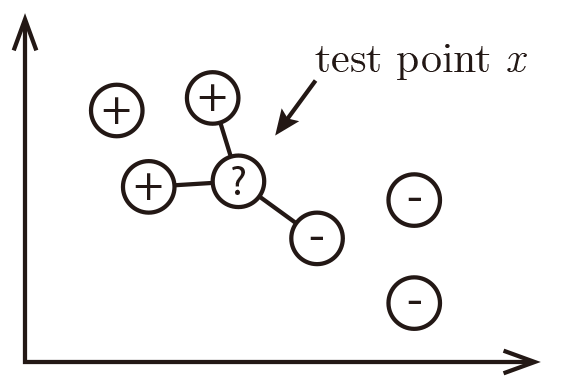

    Neighbors' labels are 2×⊕ and 1×⊖ and the result is ⊕

## Minkowski distance
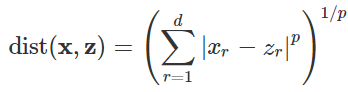

    p=1 : Manhattan (or Taxicab) distance
    p=2 : Euclidean distance
    p→∞ : Max Distance

In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# function to calculate minkowski distance between 2 points
def minkowski_distance(x, z, p=2): # default Euclidean distance
    return np.power(np.sum((x-z)**p), 1/p) 

class KNN:
    def __init__(self, k=5, p=2):
        self.k = k
        self.p = p
    
    def fit(self, xtrain, ytrain):
        self.xtrain, self.ytrain = xtrain, ytrain
    
    def predict(self, xtest):
        '''
        for each testing instance 
            iterate over entire training instance
            compute distance between single test instance and all other training instances
            find k closest of them
            find respective labels
            based on majority voting predict the predictions
        '''
        prediction = [self._predict_instance(i) for i in xtest]
        return prediction
    
    def _predict_instance(self, x):
        # comupte distances
        distances = [minkowski_distance(x , i) for i in self.xtrain]
        
        # get closest k and its label
        k_indices = np.argsort(distances)[:self.k] # argsort ==> to know which element will be taking place while sorted
        k_nearest_labels = [self.ytrain[i] for i in k_indices]
        
        # determine laber and majority vote
        return Counter(k_nearest_labels).most_common()[0][0] # max voted values - label

iris = load_iris()
print(iris.keys())
print(iris.feature_names)

x,y = iris['data'], iris['target']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [2]:
knn_clf = KNN(k=3, p=2)
knn_clf.fit(xtrain, ytrain)

# prediction 
ypred = knn_clf.predict(xtest)
print(ypred)

# testing accuracy
acc_test = accuracy_score(ytest, ypred)
print('acc_test = ',acc_test*100,'%')

# overall accuracy 
y_h = knn_clf.predict(x)
acc = accuracy_score(y, y_h)
print('acc = ',acc*100,'%')

[0, 2, 1, 2, 1, 0, 1, 1, 0, 2, 2, 1, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 0]
acc_test =  93.33333333333333 %
acc =  98.0 %
